In this tutorial you will practice the kind of data exploration we have seen in the lectures. 

There are two separate tasks; don't expect to finish them both inside a 1 hour lab session. Use the lab session to get help if you need it.

Solutions will be provided after the lab session.

In [2]:
# That set-up stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline

# Task 1: NZ Electricity Production and Use
Download the file electricity-statistics.xls and save it. 

Load Table 1 of the file electricity-statistics.xls and extract a dataframe df1 containing the quarterly data about electicity generation, broken down by type (from 1974 onwards)

The command `elec = pd.ExcelFile('location')` makes the xlsx file in location available.

`pd.read_excel(elec, 'Table 1',skiprows=1)` will read the Table 1 sheet. You will need to change the number of rows to be skipped.

In [3]:
# Here is the code to do this for Table 1
xls = pd.ExcelFile('/Users/marslast/Dropbox/Transfer/Teaching/DATA201/Datasets/electricity-statistics.xls') # Read the whole excel file into an object called "xls"
df1 = pd.read_excel(xls, 'Table 1',skiprows=9) # Read sheet named "Table 1", skip 9 blank rows on top
df1 = df1.drop(0) # As row 10 in the excel file is now title row, row 11 becomes row 0. Drop it as it is blank.
df1.head() # Have a look at the data

,Calendar quarters,27089,27181,27273,27364,27454,27546,27638,27729,27820,...,42614,42705,42795,42887,42979,43070,43160,43252,43344,% change when compared to the same quarter of the previous year
1,"Net Generation (GWh)1,2",4051.204,4802.204,5648.204,5674.204,4136.204,5298.354,5881.354,4804.354,4556.354,...,11424.211488,10260.673920,10093.278816,10878.471265,11438.620188,10500.479446,9963.954927,11039.265290,11555.014205,0.010176
2,Hydro,3201.000,3432.000,4174.000,4230.000,3242.000,4330.000,4842.000,4083.000,3604.000,...,7154.273797,6517.501803,6142.702235,6061.158635,6571.060901,6158.797630,5775.343498,6842.961914,7179.706536,0.092625
3,Geothermal,299.500,341.500,358.500,358.500,317.500,345.500,348.500,338.500,294.500,...,1873.367542,1757.436626,1817.047880,1912.620232,1938.536999,1790.770884,1699.632750,1838.438644,1923.034067,-0.007997
4,Biogas,1.899,1.899,1.899,1.899,1.899,13.149,13.149,13.149,13.149,...,62.606298,62.880248,62.373028,60.737144,61.101644,60.080544,60.072144,59.296844,60.827985,-0.004479
5,Wood,76.535,76.535,76.535,76.535,76.535,76.535,76.535,76.535,76.535,...,87.151671,79.833569,82.078624,76.614528,76.677698,68.183730,79.259094,72.708856,58.215141,-0.240781


There are some missing values in the dataset. You can make a version without by using the command
`df1 = df1.dropna()`

### Your turn
Start by getting the numbers for both overall consumption and generation over time by reading them out of df1. The two datasets are different lengths (shown by the NaN values), so you might want to only read the relevant parts of them. 

In [4]:
gen = df1.iloc[0,62:-1]  # Read generation figures from row 0 of df1. As this series is longer than the consumption one, we read only from column 62
con = df1.iloc[14,62:-1] # Read consumption figures from row 14 of df1. 

Plot the generation and consumption on the same time axis. 

/Users/marslast/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


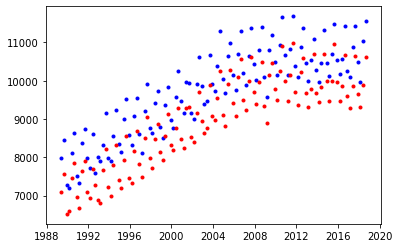

In [5]:
pl.plot(gen,'b.')
pl.plot(con,'r.')

Plot a histogram of generation methods over time. 

`pl.bar()` is the command for plotting a bar chart. Find out more using the help command or by looking at https://pythonspot.com/matplotlib-bar-chart/

You will want to construct separate bar charts for each generation method and then add a legend so you know which is which.

In [2]:
help(pl.bar)

Help on function bar in module matplotlib.pyplot:

bar(*args, **kwargs)
    Make a bar plot.
    
    Call signatures::
    
       bar(x, height, *, align='center', **kwargs)
       bar(x, height, width, *, align='center', **kwargs)
       bar(x, height, width, bottom, *, align='center', **kwargs)
    
    The bars are positioned at *x* with the given *align* ment. Their
    dimensions are given by *width* and *height*. The vertical baseline
    is *bottom* (default 0).
    
    Each of *x*, *height*, *width*, and *bottom* may either be a scalar
    applying to all bars, or it may be a sequence of length N providing a
    separate value for each bar.
    
    
    Parameters
    ----------
    x : sequence of scalars
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : scalar or sequence of scalars
        The height(s) of the bars.
    
    width : scalar or array-like, optional
        The width(s) of the

In [6]:
# Example for 3 types of generation methods
hyd=df1.iloc[1,1:]
geo=df1.iloc[2,1:]
gas=df1.iloc[9,1:]

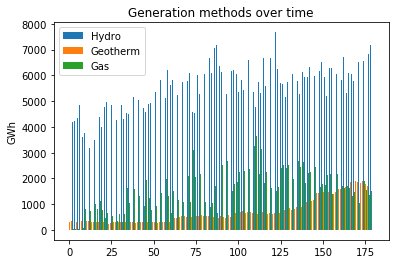

In [7]:
N = len(hyd)
ind = np.arange(N)    # index for the groups
width = 0.3           # the width of the bars

# Construct 3 bar charts
p1 = pl.bar(ind, hyd, width)
p2 = pl.bar(ind+width, geo, width)
p3 = pl.bar(ind+2*width, gas, width)

# Stack them and construct the legend
pl.ylabel('GWh')
pl.title('Generation methods over time')
pl.legend((p1[0], p2[0], p3[0]), ('Hydro', 'Geotherm','Gas'))

pl.show()

Now plot generation and consumption against each other, and fit a trend line to the data. I've given an example of plotting a trendline below.

### Example of computing a trend line
To compute a trend line in Numpy we can use `np.polyfit`. This was demonstrated in the lectures, but here is a fake example so that you can see how it works.

You will also need to use `gen = pd.to_numeric(gen, errors='coerce')` (and similarily for con) so that Python treats the numbers as floating point numbers.

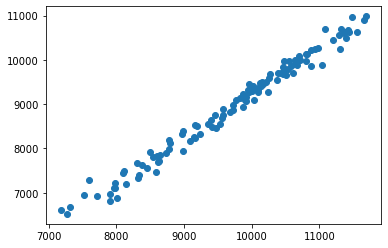

In [8]:
pl.plot(con,gen,'o') # Plot the figures

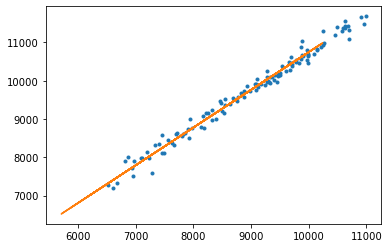

In [15]:
# Make sure pandas knows that the columns contain numbers. Errors are turned into NaN
gen = pd.to_numeric(gen, errors='coerce')
con = pd.to_numeric(con, errors='coerce')

# Fit the linear model
fit = np.polyfit(gen,con,1)

# Get the values at the datapoints
l = con*fit[0] + fit[1] 

pl.plot(con,gen,'.')
pl.plot(l,con)

In [11]:
# Here is some fake data for sample purposes
df = pd.DataFrame({'consumption': [ 503 , 584 , 587 ,570 , 566 , 656 , 662, 682 , 705 , 750 , 780 , 845 , 891 , 976 ],
                  'date': np.arange(14)})

In [12]:
# Compute a least-squares fit to the two variables
fit = np.polyfit(df.date,df.consumption,1)
# Get the values at the datapoints
l = df.date*fit[0] + fit[1] 

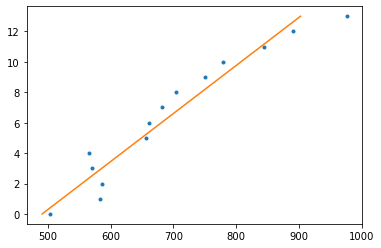

In [13]:
pl.plot(df.consumption,df.date,'.')
pl.plot(l,df.date)

# Task 2: More on the CO2 data

You are going to look more closely at a few of the more recent years of the dataset.

Start by loading the data in and giving the columns some more useful names:

In [13]:
co2 = pd.read_csv('~/Dropbox/Transfer/Teaching/DATA201/Datasets/MLO/mlo_station/daily_flask_co2_mlo.csv',skiprows=70,header=None,parse_dates=[0])
co2.columns = ['Date','Time','T1','T2','Flag1','Flag2','CO2']

If we are going to look at the year, then we need to extract it from the Date column on the dataset. One way to do this is by using the little function that I've written below. See if you can understand what it does. Ask the tutor if not.

In [14]:
def split_date(df,col):
    df[col+"_year"] = df[col].apply(lambda x: x.year)
    df[col+"_month"] = df[col].apply(lambda x: x.month)
    df[col+"_day"] = df[col].apply(lambda x: x.day)

To run it, and then show the results, use the following commands.

In [15]:
split_date(co2,'Date')
co2.head()

,Date,Time,T1,T2,Flag1,Flag2,CO2,Date_year,Date_month,Date_day
0,1960-03-31,16:00,22006.67,1960.248,2,0,318.29,1960,3,31
1,1960-04-23,10:30,22029.44,1960.310,3,4,318.61,1960,4,23
2,1960-04-24,08:00,22030.33,1960.312,3,0,319.33,1960,4,24
3,1960-07-03,15:20,22100.64,1960.504,2,4,320.35,1960,7,3
4,1960-07-17,17:00,22114.71,1960.543,2,4,315.95,1960,7,17


Your turn: Extract the data for 2016, 2017, and 2018 and plot it in two different ways:
1. In order, with the three years in different colours (so the time axis is 2016 -- 2018)
2. With the three years on top of each other in different colours (so the time axis is Jan -- Dec)

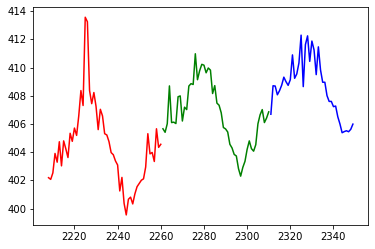

In [16]:
pl.plot(co2[co2.Date_year==2016].CO2,'r-')
pl.plot(co2[co2.Date_year==2017].CO2,'g-')
pl.plot(co2[co2.Date_year==2018].CO2,'b-')

/Users/marslast/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/marslast/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/marslast/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/marslast/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dime

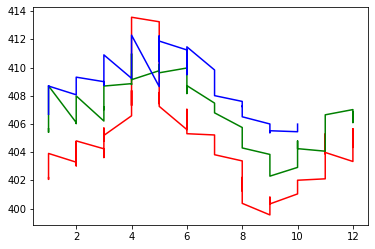

In [7]:
pl.plot(co2[co2.Date_year==2016].Date_month,co2[co2.Date_year==2016].CO2,'r-')
pl.plot(co2[co2.Date_year==2017].Date_month,co2[co2.Date_year==2017].CO2,'g-')
pl.plot(co2[co2.Date_year==2018].Date_month,co2[co2.Date_year==2018].CO2,'b-')

You might be surprised at how jagged that second plot is. You can smooth temporal data using `pd.resample`. Take a look at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html and see if you can work out how to get the mean of each month. 

In [8]:
# The tricky piece is that we have to lose a lot of columns
co2_new = co2.iloc[:,[0,6]]
co2_new.columns = ['Date','CO2']

# And we should split the dates up again
split_date(co2_new,'Date')

# Now we tell Pandas that the Date column is actually an index to the datapoint
co2_new.set_index('Date',inplace=True,drop=False)

# We resample the data to average over the months
co2_m = co2_new.resample("M").mean()
co2_m.head()

/Users/marslast/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/marslast/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/marslast/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,CO2,Date_year,Date_month,Date_day
Date,,,,
1960-03-31,318.29,1960.0,3.0,31.0
1960-04-30,318.97,1960.0,4.0,23.5
1960-05-31,NaN,NaN,NaN,NaN
1960-06-30,NaN,NaN,NaN,NaN
1960-07-31,318.15,1960.0,7.0,10.0


/Users/marslast/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/marslast/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/marslast/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Users/marslast/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dime

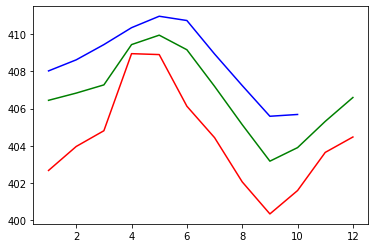

In [9]:
# Some of the months don't have any data, so get replaced by NaN. We need to drop those:
co2_m = co2_m.dropna()

# Now it looks better
co2_m.head()

# And here is the smoothed plot
pl.plot(co2_m[co2_m.Date_year==2016].Date_month,co2_m[co2_m.Date_year==2016].CO2,'r-')
pl.plot(co2_m[co2_m.Date_year==2017].Date_month,co2_m[co2_m.Date_year==2017].CO2,'g-')
pl.plot(co2_m[co2_m.Date_year==2018].Date_month,co2_m[co2_m.Date_year==2018].CO2,'b-')

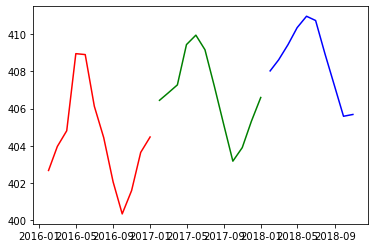

In [10]:
pl.plot(co2_m["2016"].CO2,'r-')
pl.plot(co2_m["2017"].CO2,'g-')
pl.plot(co2_m["2018"].CO2,'b-')